# Fördelningsfunktioner
Här kommer vi visa några av de diskreta fördelningsfunktioner som vi sett på veckans föreläsning. 

Vi börjar med att importera de paket som vi behöver.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

# Plotting utilities
!pip install bokeh
import plot_tools as pt
import bokeh.io
import bokeh.layouts
import bokeh.plotting
bokeh.io.output_notebook()

%matplotlib inline

Loading BokehJS ...

## Två-punktsfördelning (Bernoulli)
En av de enklaste fördelningarna är två-punktsfördelningen, som vi kallar Bernoulli. Den har två parametrar, $p$ och $q$, som anger sannolikheten för att ett slumpmässigt valt element är 1 eller 0.

Vi definierar sannolikhetsfunktionen $P(X=x)$ som:
$$ P(X=k) = p^xq^{1-x}. $$
Fördelningsfunktionen är då:
$$ 
F_X(k) = \begin{cases} 1-p & \text{om } k=0 \\ 1 & \text{om } k=1 \end{cases}
$$

In [3]:
p = 0.4

k = np.array([0, 1])
plot = pt.plot_dists(k, stats.bernoulli, (p,), ('p',), 'Bernoulli')
bokeh.io.show(plot)

## Binomialfördelningen

Binomialfördelningen ger oss möjligheten att utforska hur sannolikheten för ett visst antal framgångar i en viss antal försök är. Bionomialfördelningens sannolikhetsfunktion beskrivs av:

$$
P_X(k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

För att kunna använda oss av denna funktion behöver vi definiera våra parametrar $n$ och $p$. Vi kommer att använda oss av $n$ för att representera antalet försök och $p$ för att representera sannolikheten för att ett försök leder till en framgång. 

Vår binomialfördelning kommer att se ut som följande:


In [4]:
p = 0.4
n = 10

# Visualize the binomial distribution
k = np.arange(0, 11)
plot = pt.plot_dists(k, stats.binom, (n, p), ('n', 'p'), 'Binomial')
bokeh.io.show(plot)

### Med matplotlib
Om vi går tillbaka till matplotlib som vi sett tidigare kan vi göra samma sak som vi gjorde med Bernoulli-fördelningen. Vi kan använda oss av `binom.pmf` för att rita ut sannolikhetsfunktionen. Vi kan också använda oss av `binom.cdf` för att rita ut fördelningsfunktionen.


Vi skapar en binomialfördelning med $n=10$ och $p=0.4$.


In [5]:

n = 10
p = 0.4




Vi skapar en lista med alla möjliga utkomster för binomialfördelningen. Vi använder funktionen `np.arange` för att skapa en lista med alla heltal mellan 0 och 20.



In [6]:

x = np.arange(0, n+1)


Vi skapar en lista med alla sannolikheter för de olika utkomsterna. Vi använder funktionen `stats.binom.pmf` för att beräkna alla sannolikheter.

In [7]:
p_x = stats.binom.pmf(x, n, p)  # Probability mass function (Sannolikhetsfunktionen)
F_x = stats.binom.cdf(x, n, p)  # Cumulative distribution function  (Fördelningsfunktionen)

Vi skapar en graf som visar fördelningen.

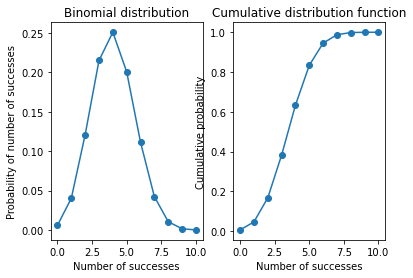

In [8]:
# Sannolikhetsfunktionen
plt.subplot(1,2,1)
plt.plot(x, p_x, 'o-')
plt.title('Binomial distribution')
plt.xlabel('Number of successes')
plt.ylabel('Probability of number of successes')

# Fördelningsfunktionen
plt.subplot(1,2,2)
plt.plot(x, F_x, 'o-')
plt.title('Cumulative distribution function')
plt.xlabel('Number of successes')
plt.ylabel('Cumulative probability')

plt.show()

## Hypergeometriska fördelningen

Hypergeometriska fördelningen ger oss möjligheten att utforska hur sannolikheten för ett visst antal framgångar i en viss antal försök är. Vi kommer att använda oss av följande hypergeometriska fördelningsfunktion:

$$
P_X(k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}
$$

För att kunna använda oss av denna funktion behöver vi definiera våra parametrar $N$, $K$ och $n$. Vi kommer att använda oss av $N$ för att representera den totala mängden objekt som vi kan välja mellan, $K$ för att representera den totala mängden framgångsobjekt och $n$ för att representera antalet försök som vi gör. 

Vår hypergeometriska fördelning kommer att se ut som följande:

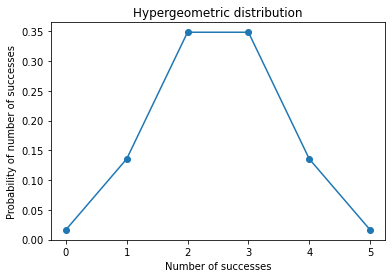

In [9]:
# Hypergeometric distribution
N = 20
K = 10
n = 5
x = np.arange(0, n+1)
y = stats.hypergeom.pmf(x, N, K, n)
plt.plot(x, y, 'o-')
plt.title('Hypergeometric distribution')
plt.xlabel('Number of successes')
plt.ylabel('Probability of number of successes')
plt.show()

### Tillämpning av hypergeometriska fördelningen
Den hypergeometriska fördelningen är användbar när vi vill undersöka hur sannolikt det är att vi får ett visst antal framgångar i en viss antal försök. Vi kan till exempel använda oss av den för att undersöka hur sannolikt det är att vi får 3 röda bollar i 5 dragningar från en påse med 10 röda och 20 vita bollar.

$$ P_X(3) = \frac{\binom{10}{3} \binom{20}{2}}{\binom{30}{5}} =  \frac{120 \cdot 190 }{142 506} = 0.15999$$

In [10]:
# Problem specific parameters
N = 10 + 20     # Total number of balls
K = 10          # Number of red balls
n = 5           # Number of balls drawn

# Calculate the probability of 3 red balls
k = 3
prob = stats.hypergeom.pmf(k, N, K, n)
print(f'Probability of drawing {k} red balls: {prob:.3f}')


Probability of drawing 3 red balls: 0.160


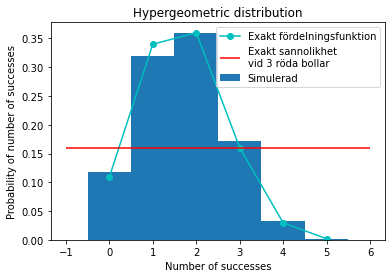

In [11]:
# Simulate the experiment
x_sim = stats.hypergeom.rvs(N, K, n, size=1000) # Random variates (draws)

# Visualize the results
plt.hist(x_sim, bins=np.arange(0, n+2)-0.5, density=True) # Histogram of the draws
y = stats.hypergeom.pmf(np.arange(0, n+1), N, K, n)       # Calculate the probability mass function
plt.plot(x, y, 'o-', c='c')
plt.hlines(prob, -1, n+1, color='r')                      # Draw a horizontal line at the probability
plt.title('Hypergeometric distribution')
plt.xlabel('Number of successes')
plt.ylabel('Probability of number of successes')
plt.legend(['Exakt fördelningsfunktion', f'Exakt sannolikhet \nvid 3 röda bollar', 'Simulerad'])
plt.show()

## Bionomialfördelningen vs. Hypergeometriska fördelningen
Observera att den hypergeometriska fördelningen tar hänsyn till att vi plockar upp bollar ur påsen, till skillnad från om vi löst uppgiften med bionomialfördelningen. Om vi löst uppgiften med bionomialfördelningen hade vi fått följande sannolikheter:

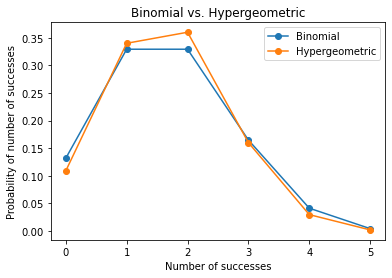

Bionomilafördelningen:
Sannolikheten för att dra 3 röda bollar med återläggning är 0.165

Hypergeometriska fördelningen:
Sannolikheten för att dra 3 röda bollar utan återläggning är 0.160



In [12]:
# Compare the binomial and hypergeometric distributions in the experiment
x = np.arange(0, n+1)
y_binom = stats.binom.pmf(x, n, K/N)
y_hyper = stats.hypergeom.pmf(x, N, K, n)
plt.plot(x, y_binom, 'o-', label='Binomial')
plt.plot(x, y_hyper, 'o-', label='Hypergeometric')
plt.title('Binomial vs. Hypergeometric')
plt.xlabel('Number of successes')
plt.ylabel('Probability of number of successes')
plt.legend()
plt.show()

# print the probability of 3 red balls
print('Bionomilafördelningen:')
print(f'Sannolikheten för att dra {k} röda bollar med återläggning är {y_binom[k]:.3f}\n')

print('Hypergeometriska fördelningen:')
print(f'Sannolikheten för att dra {k} röda bollar utan återläggning är {y_hyper[k]:.3f}\n')

# Beskrivande statistik
Inom statistiken har vi en uppsättning verktyg för att kvantifiera hur en datamängd ser ut. Några av dess är
* Medelvärde
* Median
* Varians
* Standardavvikelse
* min/max
* kvantiler


### Medelvärde
Medelvärdet beräknas med hjälp av följande formel:
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i.$$
Där $x_i$ är ett värde i datamängden och $n$ är antalet värden i datamängden. Sträcket över $\bar{x}$ är notation för medelvärdet av $x$.


Mean of x = 0.4, when p = 0.4


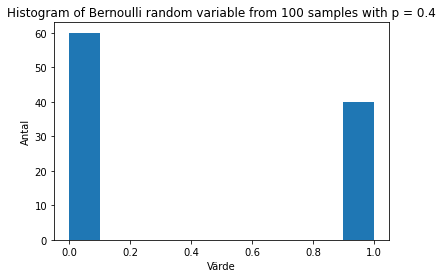

In [13]:
# Simple mean function
def mean(x):
    return np.sum(x) / len(x)

# Create a random variable
p = 0.4
n = 100
x = stats.bernoulli.rvs(p, size=n)   # Bernoulli random variable with p=0.4 => we expect 40% of 1s (successes)

# Compute the mean
print(f"Mean of x = {mean(x)}, when p = {p}")

# Plot the distribution of the random variable
plt.hist(x)
plt.xlabel('Värde')
plt.ylabel('Antal')
plt.title(f'Histogram of Bernoulli random variable from {n} samples with p = {p}')
plt.show()

### Median 
Medianen är det värde som ligger i mitten av datamängden. Om datamängden har ett jämnt antal värden är medianen det medelvärde av de två mittersta värdena.


In [14]:
# Median function
def median(x):
    x_sorted = np.sort(x)
    if len(x) % 2 == 0:
        # Even number of elements => take the average of the two middle elements
        return (x_sorted[len(x) // 2 - 1] + x_sorted[len(x) // 2]) / 2
    else:
        # Odd number of elements => take the middle element
        return x_sorted[len(x) // 2]

# Compute the median
print(f"Median of x = {median(x)}, when p = {p}")

# Varför är det så stor skillnad på medelvärde och median?

Median of x = 0.0, when p = 0.4


## Varians
Variansen är ett mått på hur spridda värdena är från sitt medelvärde i en datamängd. 
Det finns två olika definitioner av variansen. Den första är stickprovsvariansen och den andra är populationens varians. Stickprovsvariansen beräknas med följande formel:
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2.$$

Populationens varians beräknas med följande formel:
$$\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2.$$

Skillnaden mellan dessa två är att stickprovsvariansen delar med $n-1$ medan populationens varians delar med $n$. Detta beror på att stickprovsvariansen är en uppskattning av populationens varians.

##### OBS!
<ins>När man använder inbyggda funktioner i Python för att beräkna variansen behöver man läsa dokumentationen för att veta vilken formel som används.</ins>

T.ex. används stickprovsvariansen som standard i `pandas` om man utför `df.std()`, medans `numpy` använder populationsvariansen som standard. Vilken som används kan kontrolleras genom att ange `ddof = 0 eller 1` i båda biblioteken. `0` används för populationsvarians och `1` för stickprovsvarians.

#### Stickprovsvarians
Vi använder stickprovsvarians när vi utfört en undersökning med ett urval av en population. Vi kan då inte veta hur populationen ser ut utan vi kan bara säga hur urvalet ser ut. För att kompensera den ökade osäkerheten delar vi med $n-1$ istället för $n$.

* När $n$ är **stort** minskar skillnaden mellan stickprovsvariansen och populationens varians. 
* När $n$ är **litet** ökar osäkerheten i stickprovsvariansen och skillnaden mellan stickprovsvariansen och populationens varians blir större.


#### Populationsvarians
Populationsvarinsen kan vi använd när vårt dataunderlag är hela populationen. Alternativt att vi bara är intresserade av vårt nuvarande dataunderlag och inte hur det skulle se ut om vi hade gjort en annan undersökning med ett annat urval.



In [15]:
# Variance functions
def variance_sample(x):
    return np.sum((x - mean(x)) ** 2) / (len(x) - 1)

def variance_population(x):
    return np.sum((x - mean(x)) ** 2) / len(x)

# Compute the variance
print(f"Sample variance of x = {variance_sample(x)}, when p = {p}")
print(f"Population variance of x = {variance_population(x)}, when p = {p}")

Sample variance of x = 0.24242424242424246, when p = 0.4
Population variance of x = 0.24000000000000005, when p = 0.4


## Standardavvikelse
Standardavvikelsen är kvadratroten ur variansen. Detta gör att standardavvikelsen har samma måttenhet som datamängden vilket gör att standardavvikelsen är lättare att tolka i relation till datamängden.

Standrdavvikelsen har också två olika definitioner. Den första är _stickprovsstandardavvikelsen_ och den andra är _populationens standardavvikelse_. Stickprovsstandardavvikelsen beräknas med följande formel:
$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}.$$

Populationens standardavvikelse beräknas med följande formel:
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}.$$

In [16]:
# Standard deviation functions
def std_sample(x):
    return np.sqrt(variance_sample(x))

def std_population(x):
    return np.sqrt(variance_population(x))

# Compute the standard deviation
print(f"Sample standard deviation of x = {std_sample(x)}, when p = {p}")
print(f"Population standard deviation of x = {std_population(x)}, when p = {p}")

Sample standard deviation of x = 0.49236596391733095, when p = 0.4
Population standard deviation of x = 0.48989794855663565, when p = 0.4


Här ser vi att det är mycket lättare att relatera till standardavvikelsen än till variansen. 

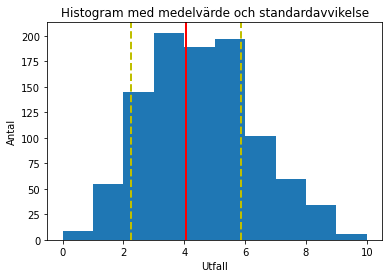

In [17]:
# Simulate a random variable from a binomial distribution
p = 0.2
n = 20
x = stats.binom.rvs(n, p, size=1000)

# x = stats.bernoulli.rvs(p, size=n)  

# Plot the distribution of the Bernoulli random variable x and compare with the standard devition
plt.hist(x)
plt.axvline(mean(x), color='r', linewidth=2)
plt.axvline(mean(x) + std_sample(x), color='y', linestyle='dashed', linewidth=2)
plt.axvline(mean(x) - std_sample(x), color='y', linestyle='dashed', linewidth=2)
plt.ylabel('Antal')
plt.xlabel('Utfall')
plt.title('Histogram med medelvärde och standardavvikelse')
plt.show()



## Min/max
Min och max är de minsta och största värdena i datamängden. Detta är värden som vi kan använda för att få en känsla för hur datamängden ser ut.

In [18]:
# Get minimum and maximum values
x_min = np.min(x)
x_max = np.max(x)

print(f"Minimum value of x = {x_min}")
print(f"Maximum value of x = {x_max}")

Minimum value of x = 0
Maximum value of x = 10


## Kvantiler
Kvantiler är värden som delar upp datamängden i lika stora delar. Om vi t.ex. vill dela upp datamängden i fyra lika stora delar så kan vi använda kvantilerna 0.25, 0.5 och 0.75. Dessa värden är då de värden som delar upp datamängden i fyra lika stora delar.

Kvantiler kan ses som en generalisering av medianen. Medan medianen är det värde som delar upp datamängden i två lika stora delar så kan kvantiler dela upp datamängden i vilket antal delar som helst. 

Man kan också se kvantiler som procentsatser av index hos en sorterad datamängd. Om vi t.ex. vill veta vilket värde som ligger på 25:e procentenhetens plats i en sorterad datamängd så kan vi använda kvantilen 0.25.

När man pratar om jämna procentenheter av kvantiler kan man också benämna detta som _**percentiler**_.


In [19]:
# Calculate the quantiles
def quantile(x, q):
    """Calculate the q-quantile of x

    Args:
        x (np.array): Array of values
        q (float): Quantile to calculate

    Returns:
        scalar: The q-quantile of x
    """
    x_sorted = np.sort(x)
    return x_sorted[int(len(x) * q)]

# Calculate the 0.25-quantile
q = 0.25
print(f"{q}-quantile of x = {quantile(x, q)}")

0.25-quantile of x = 3


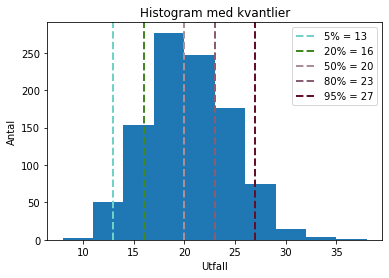

In [20]:
# Simulate a random variable from a binomial distribution
p = 0.2
n = 100
x = stats.binom.rvs(n, p, size=1000)

# # Simulate skewness
# nbr_added = int(n * 0.8)
# skew_ratio = 0.5
# x = np.concatenate((x, np.ones(nbr_added) * mean(x) * np.random.rand(nbr_added) * skew_ratio))

# Calculate quantiles
quantiles_slice_where = np.array([0.05, 0.2, 0.5, 0.8, 0.95])
quantiles_slice = [quantile(x, quantiles_slice) for quantiles_slice in quantiles_slice_where]

# Make a string with % of the quantiles
quantiles_slice_str = [f"{quantiles_slice_where[i]:.0%} = {quantiles_slice[i]}" for i in range(len(quantiles_slice_where))]

# Plot quantiles
plt.hist(x)
for quan in quantiles_slice:
    plt.axvline(quan, linestyle='dashed', color=np.random.rand(3,), linewidth=2)
plt.ylabel('Antal')
plt.xlabel('Utfall')
plt.title('Histogram med kvantlier')
plt.legend(quantiles_slice_str)
plt.show()

# Poisson fördelning
Poisson fördelningen är en diskret fördelning som används för att beskriva antalet händelser som inträffar under en viss tidsperiod. Den är användbar speciellt när antalet händelser är litet och när händelserna är oberoende av varandra.

Poisson fördelningen har följande formel:
$$P(X=k) = \frac{\mu^k e^{-\mu}}{k!}$$
där $k$ är antalet händelser och $\mu$ är väntevärdet för poisson fördelning och motsvarar antalet händelser per tidsperiod.
På grund av fördelningen bara beror på $\mu$ är den enkel att fram från simpel data.  

Poisson fördelningen är en förenkling av binomial fördelningen.
* Binomial fördelningen används när antalet händelser är stort och när händelserna är oberoende av varandra.
* Poisson fördelningen används när antalet händelser är litet och när händelserna är oberoende av varandra.

## Exempel
Om en fabrik producerar 2400 bilar per dag där 2% av dessa har trasiga komponenter. Vi vill veta hur stor chansen är att minst 5 bilar i timmen är trasiga. Då kan vi använda poisson fördelningen. 

Vi får väntevärdet för trasiga bilar pertimme som: 
$$\mu = \frac{2400}{24} \cdot 0.02 = 2$$

Vi kan nu använda fördelningen för att beräkna chansen att 5 bilar är trasiga per timme:
$$\begin{align*}
P(X \geq 5) &= 1 - P(X < 5) \\ 
 &=1 - \Bigl( P(X=0) + P(X=1) + P(X=2) + P(X=3) + P(X=4) \Bigl)\\
 &= 1 - \left( \frac{2^0 e^{-2}}{0!} + \frac{2^1 e^{-2}}{1!}+ \frac{2^2 e^{-2}}{2!}+ \frac{2^3 e^{-2}}{3!} + \frac{4^5 e^{-2}}{4!} \right) \\ &= 0.05265
\end{align*}
$$
Vilket är ungefär 1 på 19 att 5 bilar är trasiga per timme.

Låt oss se om detta kan stämma!

Number of hours with at least 5 faults: 5
Number of expected faults: 4


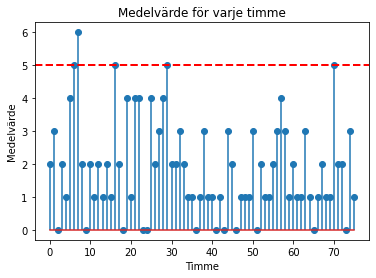

In [21]:
# Make many tries of the experiments
expected_faults = 4
nbr_hours = 19 * expected_faults

# Simulate radnom simples from the poison distribution
mu = 2
x = stats.poisson.rvs(mu, size=nbr_hours)

print(f"Number of hours with at least 5 faults: {np.sum(x >= 5)}")
print(f"Number of expected faults: {expected_faults}")

# Plot the mean of each hour
plt.stem(x)
plt.axhline(5, color='r', linestyle='dashed', linewidth=2)
plt.ylabel('Medelvärde')
plt.xlabel('Timme')
plt.title('Medelvärde för varje timme')
plt.show()

#### Får vi rätt i genomsnitt?

Average number of hours with at least 5 faults: 3.951
Expected number of hours with at least 5 faults: 4


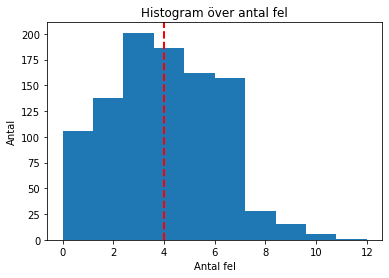

In [22]:
# Calculate average number of faults per hour over many simulations
nbr_simulations = 1000
nbr_hours = 19 * expected_faults
mu = 2
x = stats.poisson.rvs(mu, size=(nbr_simulations, nbr_hours))
nbr_faults = np.sum(x >= 5, axis=1)

print(f"Average number of hours with at least 5 faults: {np.mean(nbr_faults)}")
print(f"Expected number of hours with at least 5 faults: {expected_faults}")

# Plot the distribution of the number of faults
plt.hist(nbr_faults)
plt.axvline(expected_faults, color='r', linestyle='dashed', linewidth=2)    # plot vertical line at the expected value
plt.ylabel('Antal')
plt.xlabel('Antal fel')
plt.title('Histogram över antal fel')
plt.show()



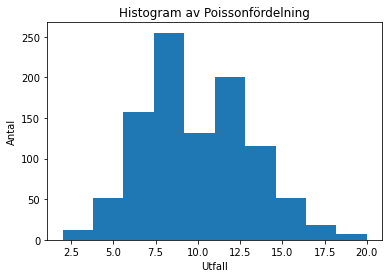

Mean of x = 9.916, when mu = 10


In [23]:
# Example of Poisson distribution with pandas
import pandas as pd

# Simulate a random variable from a Poisson distribution
mu = 10  # Mean
x = stats.poisson.rvs(mu, size=1000)    # Poisson random variable with mean mu

# Plot the distribution of the Poisson random variable x
plt.hist(x)
plt.ylabel('Antal')
plt.xlabel('Utfall')
plt.title('Histogram av Poissonfördelning')
plt.show()

# Create a pandas dataframe
df = pd.DataFrame({'x': x})

# Calculate the mean
print(f"Mean of x = {df['x'].mean()}, when mu = {mu}")

# Estimate the poisson distribution




